In [19]:
import pandas as pd

In [17]:
import sys
ROOT = '../'
sys.path.append(ROOT)  # Add the root folder to the sys.path

# Import the modules
from config import *
from dataloaders.ravdess_custom_dataloader import ravdess_custom_dataloader


# Reload the configuration
from importlib import reload
reload(sys.modules['config'])
reload(sys.modules['dataloaders.ravdess_custom_dataloader'])

# Import the reloaded modules
from config import *
from dataloaders.ravdess_custom_dataloader import ravdess_custom_dataloader


In [20]:
# Load metadata csv
video_metadata = pd.read_csv("../"+VIDEO_METADATA_CSV)
frames_metadata = pd.read_csv("../"+VIDEO_METADATA_FRAMES_CSV)

In [21]:
video_metadata

,file_name,emotion,emotion_intensity,statement,repetition,actor
0,01-01-01-01-01-01-01.mp4,0,0,0,0,0
1,01-01-01-01-01-01-02.mp4,0,0,0,0,1
2,01-01-01-01-01-01-03.mp4,0,0,0,0,2
3,01-01-01-01-01-01-04.mp4,0,0,0,0,3
4,01-01-01-01-01-01-05.mp4,0,0,0,0,4
...,...,...,...,...,...,...
1435,01-01-08-02-02-02-20.mp4,7,1,1,1,19
1436,01-01-08-02-02-02-21.mp4,7,1,1,1,20
1437,01-01-08-02-02-02-22.mp4,7,1,1,1,21
1438,01-01-08-02-02-02-23.mp4,7,1,1,1,22


In [22]:
frames_metadata

,file_name,emotion,emotion_intensity,statement,repetition,actor,frame
0,01-01-01-01-01-01-01_33.png,0,0,0,0,0,33
1,01-01-01-01-01-01-01_34.png,0,0,0,0,0,34
2,01-01-01-01-01-01-01_35.png,0,0,0,0,0,35
3,01-01-01-01-01-01-01_36.png,0,0,0,0,0,36
4,01-01-01-01-01-01-01_37.png,0,0,0,0,0,37
...,...,...,...,...,...,...,...
29184,01-01-08-02-02-02-24_49.png,7,1,1,1,23,49
29185,01-01-08-02-02-02-24_50.png,7,1,1,1,23,50
29186,01-01-08-02-02-02-24_51.png,7,1,1,1,23,51
29187,01-01-08-02-02-02-24_52.png,7,1,1,1,23,52


<Axes: xlabel='actor'>

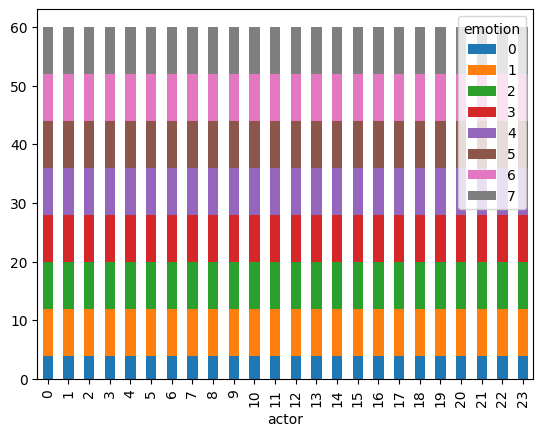

In [24]:
# For each actor, get the number of emotions
video_metadata.groupby('actor').emotion.value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='actor'>

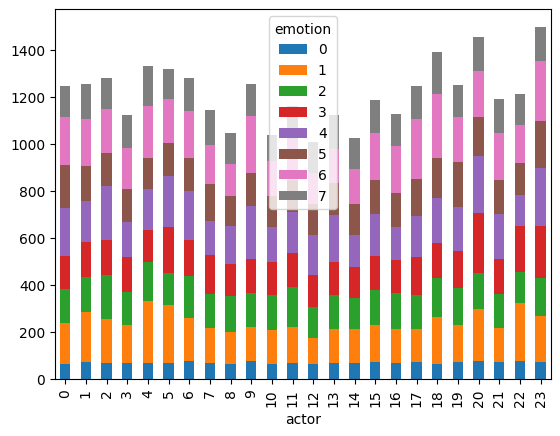

In [28]:
# For each actor, get the number of emotions
frames_metadata.groupby('actor').emotion.value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='actor'>

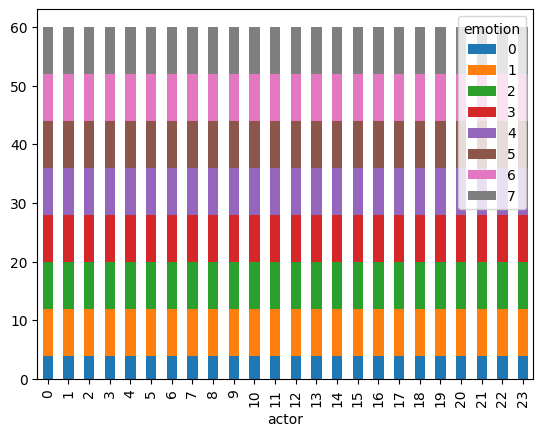

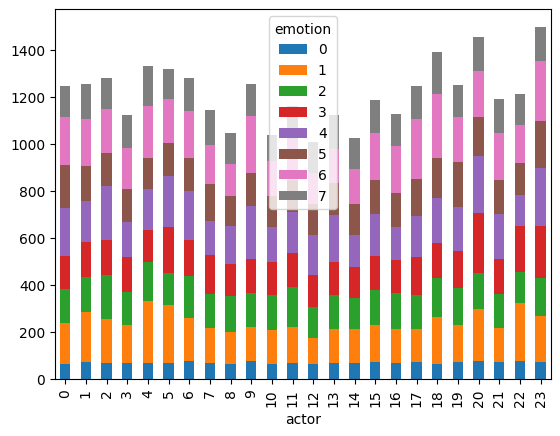

In [29]:
# Group in positive, neurtal and negative
video_metadata['emotion'] = video_metadata['emotion'].replace(['4', '5', '6', '3'], '2')
video_metadata['emotion'] = video_metadata['emotion'].replace(['2', '7'], '1')
video_metadata['emotion'] = video_metadata['emotion'].replace(['1', '0'], '0')

frames_metadata['emotion'] = frames_metadata['emotion'].replace(['4', '5', '6', '3'], '2')
frames_metadata['emotion'] = frames_metadata['emotion'].replace(['2', '7'], '1')
frames_metadata['emotion'] = frames_metadata['emotion'].replace(['1', '0'], '0')

# For each actor, get the number of emotions
video_metadata.groupby('actor').emotion.value_counts().unstack().plot(kind='bar', stacked=True)

# For each actor, get the number of emotions
frames_metadata.groupby('actor').emotion.value_counts().unstack().plot(kind='bar', stacked=True)

In [18]:
custom_dataloader = ravdess_custom_dataloader(csv_original_files="../"+VIDEO_METADATA_CSV,
                                    csv_frames_files="../"+VIDEO_METADATA_FRAMES_CSV,
                                    batch_size=BATCH_SIZE,
                                    frames_dir="../"+FRAMES_FILES_DIR,
                                    seed=RANDOM_SEED,
                                    limit=LIMIT,
                                    overlap_subjects_frames=OVERLAP_SUBJECTS_FRAMES,
                                    use_positive_negative_labels=USE_POSITIVE_NEGATIVE_LABELS,
                                    preload_frames=PRELOAD_FRAMES,
                                    apply_transformations=APPLY_TRANSFORMATIONS,
                                    balance_dataset=BALANCE_DATASET,
                                    normalize=NORMALIZE,
                                )

--Dataloader-- Splitting the dataset WITHOUT overlapping between subjects
--Dataloader-- Subjects: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
--Dataloader-- Splitting the dataset using n-1 subjects for train, 1 for val and 1 for test
Train subjects: [ 0 18 11  9 13  1 21  5  2 12 15  3  4 22 17 20 23  7 10 14 19  6] 
Validation subjects: [8] 
Test subjects: [16]
--Dataloader-- Using positive/negative labels mapping.
--- Train emotions: [0 1 2] 
--- Validation emotions: [0 1 2] 
--- Test emotions: [0 1 2]


In [13]:
train_loader = custom_dataloader.get_train_dataloader()
val_loader = custom_dataloader.get_val_dataloader() 
test_loader = custom_dataloader.get_test_dataloader()

c:\Users\danil\Documents\Repositories\MI\utils\..\datasets\ravdess_custom_dataset.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[aug_indices, "augmented"] = True
c:\Users\danil\Documents\Repositories\MI\utils\..\datasets\ravdess_custom_dataset.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna({"augmented": False}, inplace=True)


--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 2 with 15159 frames files.
--Data Balance (Oversampling)-- Adding 9740 to 0 class..
--Data Balance (Oversampling)-- Adding 8719 to 1 class..
--Data Preloading-- Preloading frames files.


100%|██████████| 27018/27018 [01:23<00:00, 324.07it/s]


--Dataset-- Train dataset size: 27018
--Data Preloading-- Preloading frames files.


100%|██████████| 1044/1044 [00:03<00:00, 318.18it/s]


--Dataset-- Validation dataset size: 1044
--Data Preloading-- Preloading frames files.


100%|██████████| 1127/1127 [00:03<00:00, 327.41it/s]

--Dataset-- Test dataset size: 1127
